<a href="https://colab.research.google.com/github/necmettinalver/Skin-cancer-classification-/blob/master/19010011015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/Colab Notebooks/input'



In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/input'



/content/drive/MyDrive/Colab Notebooks/input


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/input


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:43<00:00, 130MB/s]
100% 5.20G/5.20G [00:43<00:00, 127MB/s]


In [ ]:
!ls

kaggle.json  mydata  skin-cancer-mnist-ham10000.zip


In [ ]:
!unzip \*.zip && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10

In [ ]:
!ls

ham10000_images_part_1	HAM10000_metadata.csv  hmnist_8_8_RGB.csv
HAM10000_images_part_1	hmnist_28_28_L.csv     kaggle.json
ham10000_images_part_2	hmnist_28_28_RGB.csv   mydata
HAM10000_images_part_2	hmnist_8_8_L.csv


In [ ]:
import matplotlib.pyplot as plt #verileri görselleştirme
import numpy as np              #matris işlemleri için
import pandas as pd             #csv dosyalarını okumak ve editlemek için
import os                       #işletim sistemine ulaşmak için, resimlerin pathlerini almak için işletim sistemine erişim sağlıyor
from glob import glob           #aradığın bir dosyayı bulmayı sağlıyor
import seaborn as sns           #veri görselleştirmek için, matplotlib ile birlikte çalışır.
from PIL import Image           #sayısal olarak aldığımız pixelleri resme dönüştürüyor
import tensorflow as tf         #yapay zeka modellerini kurmak için kullanılıyor
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.shape #veri setimin boyutlarını görüntüledim 10015 satır, 8 sütundan oluşuyormuş.

(10015, 7)

In [ ]:
df.isna().sum() #niteliklerimde (sütunlarımdaki) boş kayıtların toplamını yazdırdım.


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
#! bilgisayarlar kategori halinde olan çıktı değerlerini algılamadığı için onları sayısal olarak bir değere eşitlememiz lazım
le = LabelEncoder()         #label encoder kütüphanesi bunu bizim için çok kolay hale getiriyor
le.fit(df['dx'])       #sayısal değerlere dönüştüreceğimiz sütünu yazıyoruz. bu aynı zamanda sonuç değişkenimiz.

print(le.classes_)

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


In [ ]:
print(df) #tablodan rastgele 10 tane satır gösteriyoruz

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [ ]:
df['label'] = le.transform(df["dx"])
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,2
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,2


In [ ]:
df['dx'].value_counts() # dx sütunundaki değerlerin sayısı

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

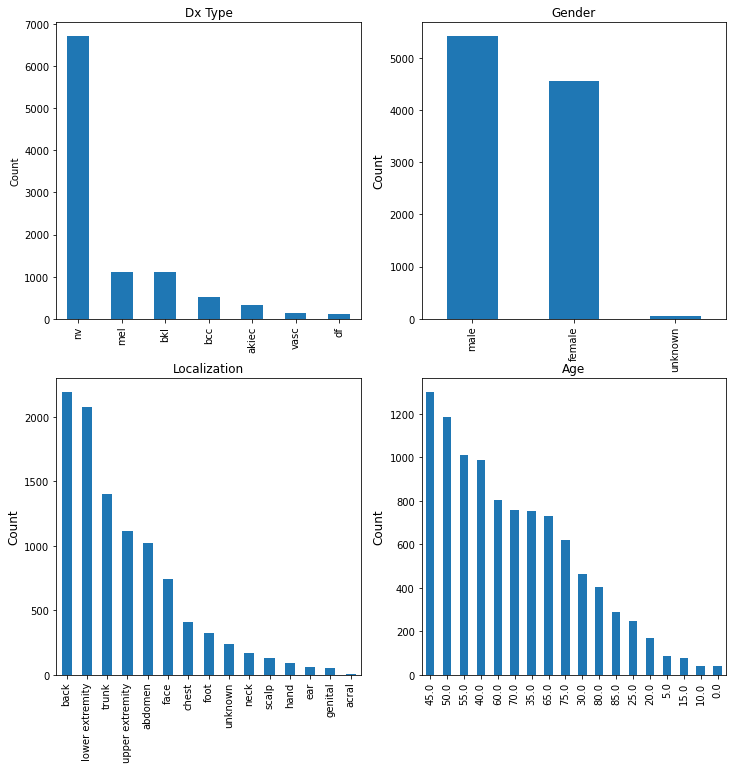

In [ ]:
fig = plt.figure(figsize=(12,12)) #birden fazla veri tablosu görselleştirmek için bir alan oluşturdum

ax1 = fig.add_subplot(221) #sol üst anlamına geliyor. 2x2 lik böldüğümüz alanda 1. yere yerleştiriyoruz ->221
df['dx'].value_counts().plot(kind='bar', ax=ax1)#kind hangi tipte verileri gösterceğimizi belirliyor, ax ise hangi köşe olduğunu
ax1.set_ylabel('Count') #y ekseninin adını yazıyor
ax1.set_title('Dx Type')

ax2 = fig.add_subplot(222) #sağ üst anlamına geliyor.
df['sex'].value_counts().plot(kind='bar', ax=ax2) #bar sütunsal
ax2.set_ylabel('Count', size=12)
ax2.set_title('Gender')

ax3 = fig.add_subplot(223) #sol alt anlamına geliyor.
df['localization'].value_counts().plot(kind='bar',ax=ax3)
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224) #sağ alt anlamına geliyor.
df['age'].value_counts().plot(kind='bar',ax=ax4)
ax4.set_ylabel('Count', size=12)
ax4.set_title('Age')

#plt.tight_layout() tabloların sığmasını sağlıyor.
plt.show() #tabloları göstericez.

In [ ]:
dx = df['dx'].value_counts().sort_index()
print(dx)

akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: dx, dtype: int64


In [ ]:
categories = dx.index.values
print(categories)

counts = dx.values
print(counts)

['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
[ 327  514 1099  115 1113 6705  142]


In [ ]:
labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 'Benign Keratosis', 'Dermatofibroma', 'Malignant Melanoma', 'Melanocytic Nevi', 'Vascular Lesions']

num_classes = len(labels) # = len(categories)

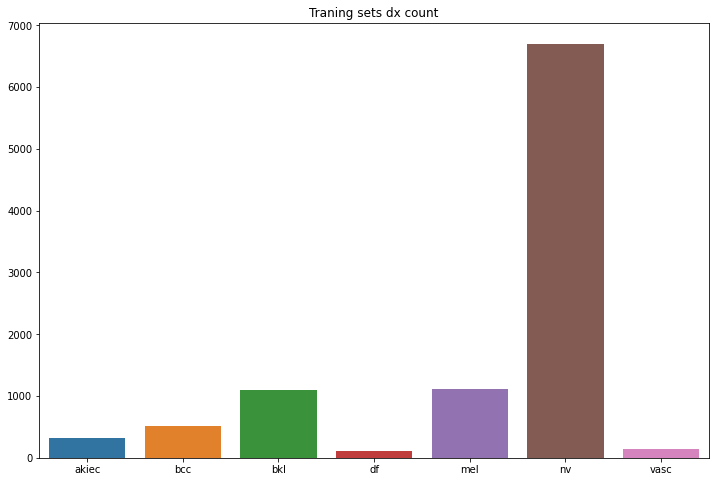

In [ ]:
plt.figure(figsize=(12, 8))
sns_bar = sns.barplot(x=categories, y=counts)
sns_bar.set_xticklabels(categories)
plt.title('Traning sets dx count')
plt.show()

In [ ]:
#--------------------------------------------#
#--------------------------------------------#
#--------------------------------------------#
#--------------------------------------------#
#--------------------------------------------#
#--------------------------------------------#

In [ ]:

data_dir = 'data'#açmak istediğim klasörün ismi
os.mkdir(data_dir)#kodumuzun bulunduğu dizine os kütüphanesiyle bir klasör açtım.

train_dir = os.path.join(data_dir, 'train')#os path ile data klasörümüzün içine ulaşmak için yeni yol(path - dizin adesi) oluşturdum.
os.mkdir(train_dir)# dosya yolunun içine verdiğimiz pathi kullanarak klasör oluşturdum.


val_dir = os.path.join(data_dir, 'val')#aynı işlem.
os.mkdir(val_dir)

test_dir = os.path.join(data_dir, 'test')#aynı işlem.
os.mkdir(test_dir)

In [ ]:
for category in categories:
    os.mkdir(os.path.join(train_dir, category))
    os.mkdir(os.path.join(val_dir,   category))
    os.mkdir(os.path.join(test_dir,  category))

In [ ]:
!ls data/train
!ls data/val
!ls data/test

akiec  bcc  bkl  df  mel  nv  vasc
akiec  bcc  bkl  df  mel  nv  vasc
akiec  bcc  bkl  df  mel  nv  vasc


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_tmp = train_test_split(df, test_size=0.2, random_state=101, stratify=df['dx'])
df_val, df_test = train_test_split(df_tmp, test_size=0.5, random_state=101)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(8012, 8)
(1001, 8)
(1002, 8)


In [ ]:
df_train = df_train.set_index('image_id')
df_val   = df_val.set_index('image_id')
df_test  = df_test.set_index('image_id')

In [ ]:
import shutil
folder_1 = os.listdir('ham10000_images_part_1')
folder_2 = os.listdir('ham10000_images_part_2')

def copy_files(df, data_dir):
    fileList = df.index.values

    for file in fileList:
        fname = file + '.jpg'
        label = df.loc[file, 'dx']

        if fname in folder_1:
            src = os.path.join('ham10000_images_part_1', fname)
            dst = os.path.join(data_dir, label, fname)
            shutil.copyfile(src, dst)

        if fname in folder_2:
            src = os.path.join('ham10000_images_part_2', fname)
            dst = os.path.join(data_dir, label, fname)
            shutil.copyfile(src, dst)

In [ ]:
copy_files(df_train, train_dir)
copy_files(df_val, val_dir)
copy_files(df_test, test_dir)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
target_size = (224,224)
batch_size = 16


In [ ]:

# Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 8012 images belonging to 7 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    'data/val',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 1001 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 1002 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import models, layers

In [ ]:
!pip install -q efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.5 MB/s eta 0:00:00


In [ ]:
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB7(input_shape=(224,224,3), weights='imagenet', include_top=False)

258434480/258434480 [==============================] - 6s 0us/step


In [ ]:
x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
out=layers.Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=models.Model(inputs=base_model.input,outputs=out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 64  256         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

num_epochs = 20

In [ ]:
# Add weights to make the model more sensitive to melanoma due to data equilibre
class_weights={
    0: 1.0,  # akiec
    1: 1.0,  # bcc
    2: 1.0,  # bkl
    3: 1.0,  # df
    4: 3.0,  # mel
    5: 1.0,  # nv
    6: 1.0,  # vasc
}

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, class_weight=class_weights, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID)

<ipython-input-47-bbbaa3cdc0be>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, class_weight=class_weights, validation_data=valid_generator, validation_steps=STEP_SIZE_VALID)


Epoch 1/20
500/500 [==============================] - 518s 944ms/step - loss: 1.3351 - accuracy: 0.6077 - val_loss: 0.9817 - val_accuracy: 0.6986
Epoch 2/20
500/500 [==============================] - 464s 928ms/step - loss: 1.1499 - accuracy: 0.6297 - val_loss: 0.9444 - val_accuracy: 0.6310
Epoch 3/20
500/500 [==============================] - 464s 927ms/step - loss: 1.0698 - accuracy: 0.6677 - val_loss: 101.4348 - val_accuracy: 0.6764
Epoch 4/20
500/500 [==============================] - 465s 928ms/step - loss: 1.0357 - accuracy: 0.6803 - val_loss: 0.8843 - val_accuracy: 0.7127
Epoch 5/20
500/500 [==============================] - 465s 929ms/step - loss: 0.9991 - accuracy: 0.7002 - val_loss: 0.8067 - val_accuracy: 0.7046
Epoch 6/20
500/500 [==============================] - 464s 927ms/step - loss: 0.9549 - accuracy: 0.7087 - val_loss: 0.8810 - val_accuracy: 0.6290
Epoch 7/20
500/500 [==============================] - 465s 929ms/step - loss: 0.9073 - accuracy: 0.7319 - val_loss: 1.0956

In [ ]:
# Save Model
models.save_model(model, 'tl_skinlesion.h5')


In [ ]:
# Evaluate Model
loss, acc = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

<ipython-input-74-71145becb8c6>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)


The accuracy of the model is 0.689
The Loss in the model is 1.072


In [ ]:
import tensorflow.keras as keras

# Define the custom layer
class FixedDropout(keras.layers.Layer):
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super(FixedDropout, self).__init__(**kwargs)
        self.rate = rate
        self.noise_shape = noise_shape
        self.seed = seed

    def call(self, inputs, training=None):
        if training:
            return keras.backend.dropout(inputs, level=self.rate, noise_shape=self.noise_shape, seed=self.seed)
        return inputs

    def get_config(self):
        config = super(FixedDropout, self).get_config()
        config.update({'rate': self.rate, 'noise_shape': self.noise_shape, 'seed': self.seed})
        return config

# Register the custom layer
keras.utils.get_custom_objects().update({'FixedDropout': FixedDropout})


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('tl_skinlesion.h5')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
df[df.label==6].head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2320,HAM_0006889,ISIC_0031197,vasc,histo,20.0,male,upper extremity,6
2321,HAM_0006889,ISIC_0031270,vasc,histo,20.0,male,upper extremity,6
2322,HAM_0001920,ISIC_0029486,vasc,histo,55.0,male,back,6
2323,HAM_0001920,ISIC_0031901,vasc,histo,55.0,male,back,6
2324,HAM_0005155,ISIC_0032076,vasc,histo,85.0,male,lower extremity,6


In [ ]:
classes = {5: ('nv', ' melanocytic nevi'),
           4: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           6: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}


In [ ]:
def img_prd(image_id):
  try:
    full_path = 'HAM10000_images_part_2/'+image_id
    img = cv2.imread(full_path)
    cv2_imshow(img)
  except AttributeError:
    try:
      full_path = 'HAM10000_images_part_1/'+image_id
      img = cv2.imread(full_path)
      cv2_imshow(img)
    except AttributeError:
      full_path = image_id
      img = cv2.imread(full_path)
      cv2_imshow(img)

  img = tf.keras.preprocessing.image.load_img(full_path, target_size=(224, 224))
  img_tensor = tf.keras.preprocessing.image.img_to_array(img)  # (height, width, channels)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  result = model.predict(img_tensor)

  class_ind = list(result[0]).index(max(result[0]))
  class_name = classes[class_ind]
  print('Pred is ',class_name)

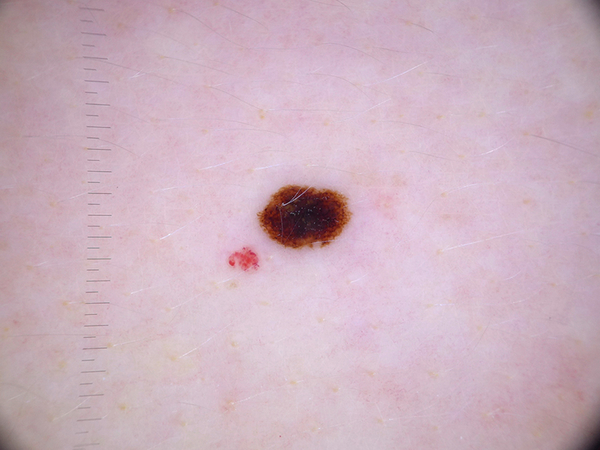

1/1 [==============================] - 14s 14s/step
Pred is  ('mel', 'melanoma')


In [ ]:
image_id = 'ISIC_0025964.jpg'

img_prd(image_id)


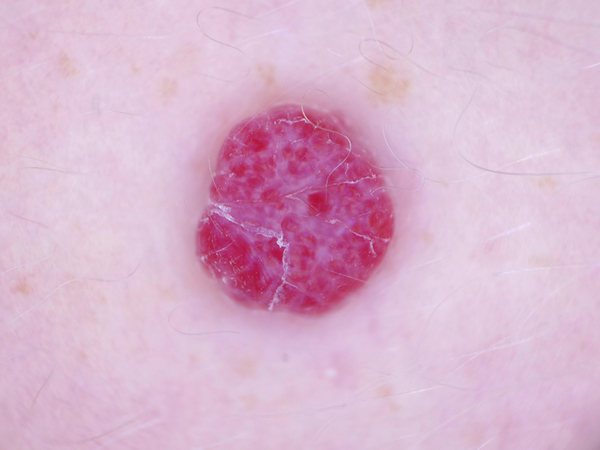

1/1 [==============================] - 0s 43ms/step
Pred is  ('vasc', ' pyogenic granulomas and hemorrhage')


In [ ]:
full_path = 'ISIC_0031197.jpg'

img_prd(full_path)